# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_total=len(cities)
city_total

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
url = 'http://api.openweathermap.org/data/2.5/weather?q='

latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
date = []
city =[]

print(f"Beginning Data Retrieval")   
print("-----------------------------")

for x in range(len(cities)):
    try:
        response = requests.get(f"{url}{cities[x]}&units=imperial&appid={weather_api_key}").json()
        
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        date.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
        city.append(cities[x])
        
        print(f"Processing Record {x + 1} of {city_total} | {cities[x]}")
    
    #if data is not correct let user know
    except KeyError:
        print("City not found. Skipping...")

    
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 608 | hobart
Processing Record 2 of 608 | busselton
Processing Record 3 of 608 | marsa matruh
Processing Record 4 of 608 | ponta do sol
Processing Record 5 of 608 | fortuna
City not found. Skipping...
Processing Record 7 of 608 | cape town
Processing Record 8 of 608 | rikitea
Processing Record 9 of 608 | saskylakh
Processing Record 10 of 608 | ushuaia
Processing Record 11 of 608 | kruisfontein
Processing Record 12 of 608 | atuona
Processing Record 13 of 608 | ribeira grande
Processing Record 14 of 608 | antofagasta
Processing Record 15 of 608 | kapaa
Processing Record 16 of 608 | vaini
Processing Record 17 of 608 | mataura
Processing Record 18 of 608 | bluff
Processing Record 19 of 608 | new norfolk
Processing Record 20 of 608 | ovre ardal
Processing Record 21 of 608 | qaanaaq
Processing Record 22 of 608 | albanel
Processing Record 23 of 608 | homer
Processing Record 24 of 608 | saint george
City not found. S

Processing Record 210 of 608 | grindavik
Processing Record 211 of 608 | bardiyah
City not found. Skipping...
Processing Record 213 of 608 | amboise
City not found. Skipping...
Processing Record 215 of 608 | novyy urgal
Processing Record 216 of 608 | kahului
Processing Record 217 of 608 | pelotas
Processing Record 218 of 608 | arrifes
Processing Record 219 of 608 | chor
Processing Record 220 of 608 | takhtamygda
Processing Record 221 of 608 | mar del plata
Processing Record 222 of 608 | biak
Processing Record 223 of 608 | kaitangata
Processing Record 224 of 608 | norman wells
Processing Record 225 of 608 | lakselv
Processing Record 226 of 608 | geraldton
Processing Record 227 of 608 | beloha
Processing Record 228 of 608 | yulara
Processing Record 229 of 608 | tumaco
Processing Record 230 of 608 | fort-shevchenko
Processing Record 231 of 608 | moosomin
Processing Record 232 of 608 | nikolskoye
Processing Record 233 of 608 | oromocto
Processing Record 234 of 608 | mokobeng
Processing Reco

Processing Record 419 of 608 | puerto del rosario
Processing Record 420 of 608 | yeppoon
Processing Record 421 of 608 | itarema
Processing Record 422 of 608 | prince rupert
Processing Record 423 of 608 | ryotsu
Processing Record 424 of 608 | kailua
Processing Record 425 of 608 | bonavista
Processing Record 426 of 608 | gravdal
Processing Record 427 of 608 | skelleftea
Processing Record 428 of 608 | villarrobledo
Processing Record 429 of 608 | higueron
City not found. Skipping...
Processing Record 431 of 608 | alyangula
Processing Record 432 of 608 | saint anthony
Processing Record 433 of 608 | leningradskiy
Processing Record 434 of 608 | karratha
Processing Record 435 of 608 | halifax
Processing Record 436 of 608 | salta
Processing Record 437 of 608 | tiznit
Processing Record 438 of 608 | atambua
Processing Record 439 of 608 | tokur
Processing Record 440 of 608 | san jose
Processing Record 441 of 608 | mahenge
Processing Record 442 of 608 | shahr-e babak
Processing Record 443 of 608 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_df = pd.DataFrame.from_dict({"City": city,
                           "Latitude": latitude,
                           "Longitude": longitude,
                           "Humidity": humidity,
                           "Max Temp": temperature,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Date": date
                          })

weather_df.to_csv("City_Weather_Data.csv")

weather_df.head()

,City,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date
0,hobart,-42.8794,147.3294,47,59.00,20,11.50,1619424301
1,busselton,-33.6500,115.3333,57,73.00,100,5.77,1619424298
2,marsa matruh,31.3525,27.2453,63,66.20,40,14.97,1619424128
3,ponta do sol,32.6667,-17.1000,79,60.01,31,3.00,1619424317
4,fortuna,40.5982,-124.1573,100,46.99,90,4.14,1619424473


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
weather_df.describe()

,Latitude,Longitude,Humidity,Max Temp,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,21.005114,13.069724,67.830325,59.606859,52.597473,8.202220,1.619425e+09
std,34.059549,89.585961,23.360840,19.920506,40.054286,5.579032,2.166424e+02
min,-54.800000,-175.200000,1.000000,0.000000,0.000000,0.400000,1.619424e+09
25%,-7.470100,-67.726650,54.000000,44.600000,8.250000,4.000000,1.619424e+09
50%,27.528800,18.769950,73.000000,59.870000,54.000000,6.910000,1.619425e+09
75%,49.782825,87.787950,86.000000,75.990000,96.000000,11.500000,1.619425e+09
max,78.218600,179.316700,100.000000,107.980000,100.000000,28.100000,1.619425e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

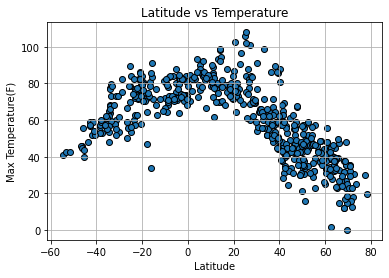

In [15]:
plt.scatter(weather_df['Latitude'], weather_df['Max Temp'], marker='o', edgecolors='black')
plt.title('Latitude vs Temperature')
plt.ylabel('Max Temperature(F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.show()

## Latitude vs. Humidity Plot

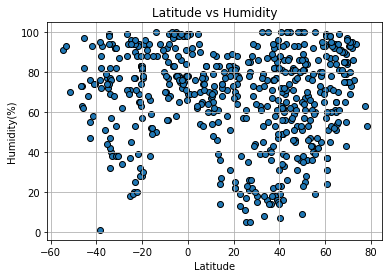

In [16]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], marker= 'o', edgecolors= 'black')
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity(%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

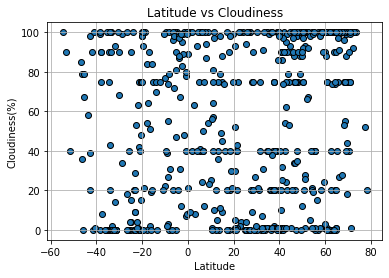

In [18]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'], marker= 'o', edgecolors= 'black')
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

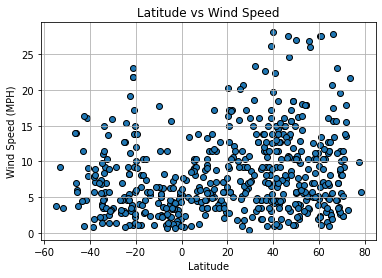

In [19]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'], marker= 'o', edgecolors= 'black')
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.grid(True)

plt.show()

## Linear Regression

In [21]:
northern_hem= weather_df.loc[weather_df['Latitude']>= 0]
northern_hem.reset_index(inplace=True)


In [22]:
southern_hem= weather_df.loc[weather_df['Latitude']<0]
southern_hem.reset_index(inplace=True)


In [28]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-value is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=10,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8555215307113356


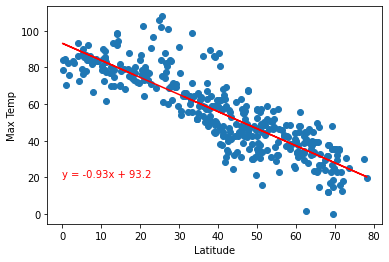

In [29]:
xlbl = "Latitude"
ylbl = "Max Temp"
lblpos = (0,20)
plotLinearRegression(northern_hem[xlbl],northern_hem[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6540338279872999


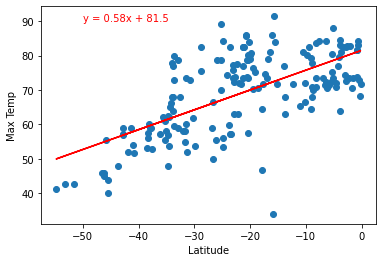

In [30]:
xlbl = "Latitude"
ylbl = "Max Temp"
lblpos = (-50, 90)
plotLinearRegression(southern_hem[xlbl],southern_hem[ylbl],xlbl,ylbl,lblpos,5)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14550692432582862


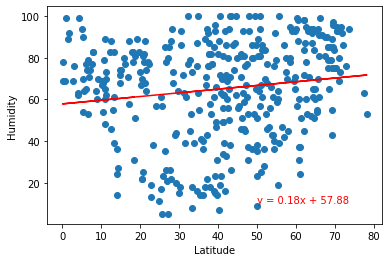

In [34]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (50,10)
plotLinearRegression(northern_hem[xlbl],northern_hem[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.207288627267789


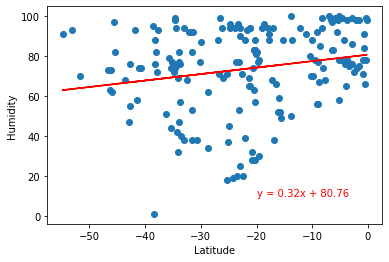

In [36]:
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (-20,10)
plotLinearRegression(southern_hem[xlbl],southern_hem[ylbl],xlbl,ylbl,lblpos,5)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1780820909291148


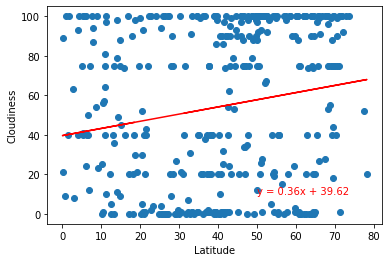

In [38]:
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (50,10)
plotLinearRegression(northern_hem[xlbl],northern_hem[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14649039946887993


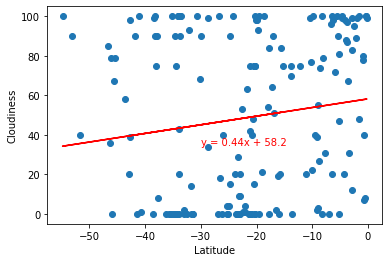

In [40]:
xlbl = "Latitude"
ylbl = "Cloudiness"
lblpos = (-30,35)
plotLinearRegression(southern_hem[xlbl],southern_hem[ylbl],xlbl,ylbl,lblpos,5)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10417272554075364


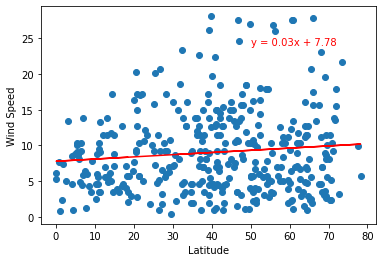

In [43]:
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (50,24)
plotLinearRegression(northern_hem[xlbl],northern_hem[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.20038715441403707


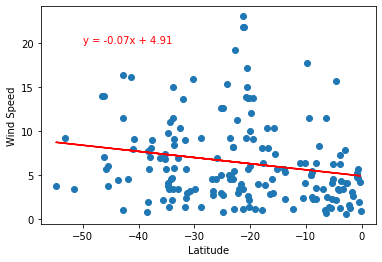

In [44]:
xlbl = "Latitude"
ylbl = "Wind Speed"
lblpos = (-50,20)
plotLinearRegression(southern_hem[xlbl],southern_hem[ylbl],xlbl,ylbl,lblpos,5)